<a href="https://colab.research.google.com/github/Sardorbek-HUB/AI_Application/blob/main/AI_Application_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12
FILE_NAME = 'book_store_sales.csv'

def readfile(file_name):
  file = open(file_name, 'r', encoding = 'utf-8')
  next(file)
  data = []
  for line in (file):
    values = line.split(',')
    data.append(float(values[1]))
  file.close()
  return np.array(data, dtype=np.float32)

sales = readfile(FILE_NAME)
months = len(sales)
split = int(months * TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales[split:]

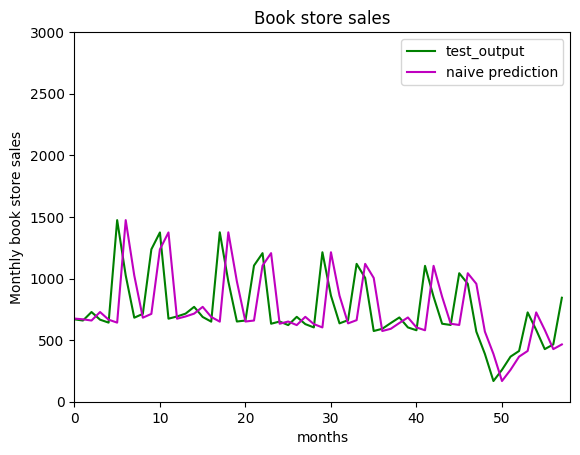

In [9]:
test_output = test_sales[MIN:]
naive_prediction = test_sales[MIN-1:-1]
x = range(len(test_output))
plt.plot(x, test_output, 'g-', label = 'test_output')
plt.plot(x, naive_prediction, 'm-', label = 'naive prediction')
plt.title('Book store sales')
plt.axis([0, len(test_output), 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()

In [11]:
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev

In [17]:
train_months = len(train_sales)
train_X = np.zeros((train_months-MIN, train_months-1, 1))
train_y = np.zeros((train_months-MIN, 1))
for i in range(0, train_months-MIN):
  train_X[i, -(i+MIN):, 0] = train_sales_std[0:i+MIN]
  train_y[i, 0] = train_sales_std[i+MIN]

test_months = len(test_sales)
test_X = np.zeros((test_months-MIN, test_months-1, 1))
test_y = np.zeros((test_months-MIN, 1))
for i in range(0, test_months-MIN):
  test_X[i, -(i+MIN):, 0] = test_sales_std[0:i+MIN]
  test_y[i, 0] = test_sales_std[i+MIN]

In [20]:
model = Sequential()
model.add(SimpleRNN(128, activation='relu',
                    input_shape=(None, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam',
              metrics = ['mean_absolute_error'])
model.summary()
history = model.fit(train_X, train_y,
                    validation_data
                    = (test_X, test_y), epochs = EPOCHS,
                    batch_size = BATCH_SIZE, verbose = 2,
                    shuffle = True)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16769 (65.50 KB)
Trainable params: 16769 (65.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
17/17 - 3s - loss: 0.7571 - mean_absolute_error: 0.6445 - val_loss: 0.5417 - val_mean_absolute_error: 0.6589 - 3s/epoch - 206ms/step
Epoch 2/100
17/17 - 1s - loss: 0.3774 - mean_absolute_error: 0.4510 - val_loss: 0.2068 - val_mean_absolute_error: 0.3404 - 706ms/epoch - 42ms/step
Epoch 3/100
17/17 - 1s - loss: 0.1685 - mean_absolute_error: 0.3170 - val_loss: 0.1233 - val_mean_absolute_error: 0.2294 -